In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.datasets import make_swiss_roll
from paper_utils import *
from matplotlib.colors import LinearSegmentedColormap

from ManifoldDiffusionGeometry import *
from Visualise import *

### Make figures

In [6]:
r=1
R=3

data = Torus(r, R, 600, 0.1)
# px.scatter_3d(x = data[:,0],
#               y = data[:,1],
#               z = data[:,2]).show()

bundle, _,_,_ = Tangents_and_Curvature(data, 2)
fig = plot_tangent_planes_3d(bundle, data, angle = [3,3,2], zoom = 0.8)
fig.show()
# true_normals = true_normals_torus(data, R)
# estimated_normals = bundle[:,:,2]
# angles = angles_between_vectors(true_normals, estimated_normals)
# print(np.mean(angles))
# fig.show()

In [7]:
data, _ = make_swiss_roll(n_samples=1400, noise=0.4)
bundle, _,_,scalar = Tangents_and_Curvature(data, 2)
fig = plot_tangent_planes_3d(bundle, data, angle = [1,4,1], zoom = 0.12)
fig.show()

print(scalar.mean())

0.0002756322772293786


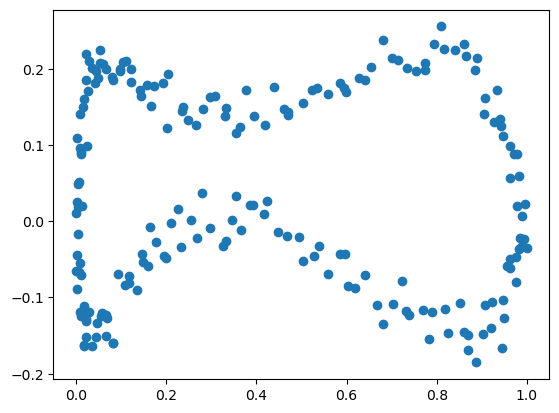

In [8]:
n = 200
xx = np.linspace(0, 2*np.pi, n)
circle = np.array([[np.cos(x), np.sin(x)] for x in xx])
data = circle + 0.6*np.array([[np.cos(1*x), np.sin(3*x)] for x in xx]) + 0.5*circle**2
data *= [1,0.15]
data += 0.02*np.random.randn(n, 2)

x_vals = data[:,0]
x_vals -= x_vals.min()
x_vals /= x_vals.max()
data += 0.0 * x_vals.reshape(-1,1) * np.random.randn(n, 2)
plt.scatter(x = data[:,0], y = data[:,1])
# plt.show()

bundle, _,_,_ = Tangents_and_Curvature(data, 1, n0=30)

fig = plot_tangent_lines_2d(bundle, data)
fig.show()

In [9]:
n = 600
xx = np.linspace(0, 2*np.pi, n)
data = np.array([[(1+0.5*np.cos(x))*np.cos(5*x), 
                     (1+0.5*np.cos(x))*np.sin(5*x), 
                     np.sin(1*x)] for x in xx])
data += 0. * np.random.randn(n,3)

px.scatter_3d(x = data[:,0],
              y = data[:,1],
              z = data[:,2]).show()

bundle, _,_,_ = Tangents_and_Curvature(data, 1, n0=30)

fig = plot_tangent_lines_3d(bundle, data, angle = [1.3,2,1], zoom = 1)
fig.show()

### Test accuracy on torus

In [10]:
R = 2
r = 1

diffusion_means = []
lpca_means1 = []
lpca_means2 = []
diffusion_stds = []
lpca_stds1 = []
lpca_stds2 = []

numbers = [150,200,300,400,600,1000,2000,5000]
sigmas = [0,0.01,0.02,0.05,0.1,0.15,0.2,0.25]

for n in numbers:
    print(n)
    diffusion_n_means = []
    lpca_n_means1 = []
    lpca_n_means2 = []
    diffusion_n_stds = []
    lpca_n_stds1 = []
    lpca_n_stds2 = []
    for sigma in sigmas:
        # print(n,sigma)
        diffusion_runs = []
        lpca_runs1 = []
        lpca_runs2 = []
        for runs in range(10):
            data = Torus(r, R, n, sigma)
            d, l1, l2 = test_tangent_spaces_torus(data, R=2, k1=5, k2=100)
            diffusion_runs.append(d)
            lpca_runs1.append(l1)
            lpca_runs2.append(l2)
        diffusion_n_means.append(np.mean(diffusion_runs))
        lpca_n_means1.append(np.mean(lpca_runs1))
        lpca_n_means2.append(np.mean(lpca_runs2))
        diffusion_n_stds.append(np.std(diffusion_runs))
        lpca_n_stds1.append(np.std(lpca_runs1))
        lpca_n_stds2.append(np.std(lpca_runs2))
    diffusion_means.append(diffusion_n_means)
    lpca_means1.append(lpca_n_means1)
    lpca_means2.append(lpca_n_means2)
    diffusion_stds.append(diffusion_n_stds)
    lpca_stds1.append(lpca_n_stds1)
    lpca_stds2.append(lpca_n_stds2)

diffusion_means = np.array(diffusion_means)
lpca_means1 = np.array(lpca_means1)
lpca_means2 = np.array(lpca_means2)
diffusion_stds = np.array(diffusion_stds)
lpca_stds1 = np.array(lpca_stds1)
lpca_stds2 = np.array(lpca_stds2)

150
200
300
400
600
1000
2000
5000


(<Figure size 3900x11700 with 3 Axes>,
 <Axes: title={'center': 'Local PCA, k = 100'}, xlabel='Noise (standard deviation)'>)

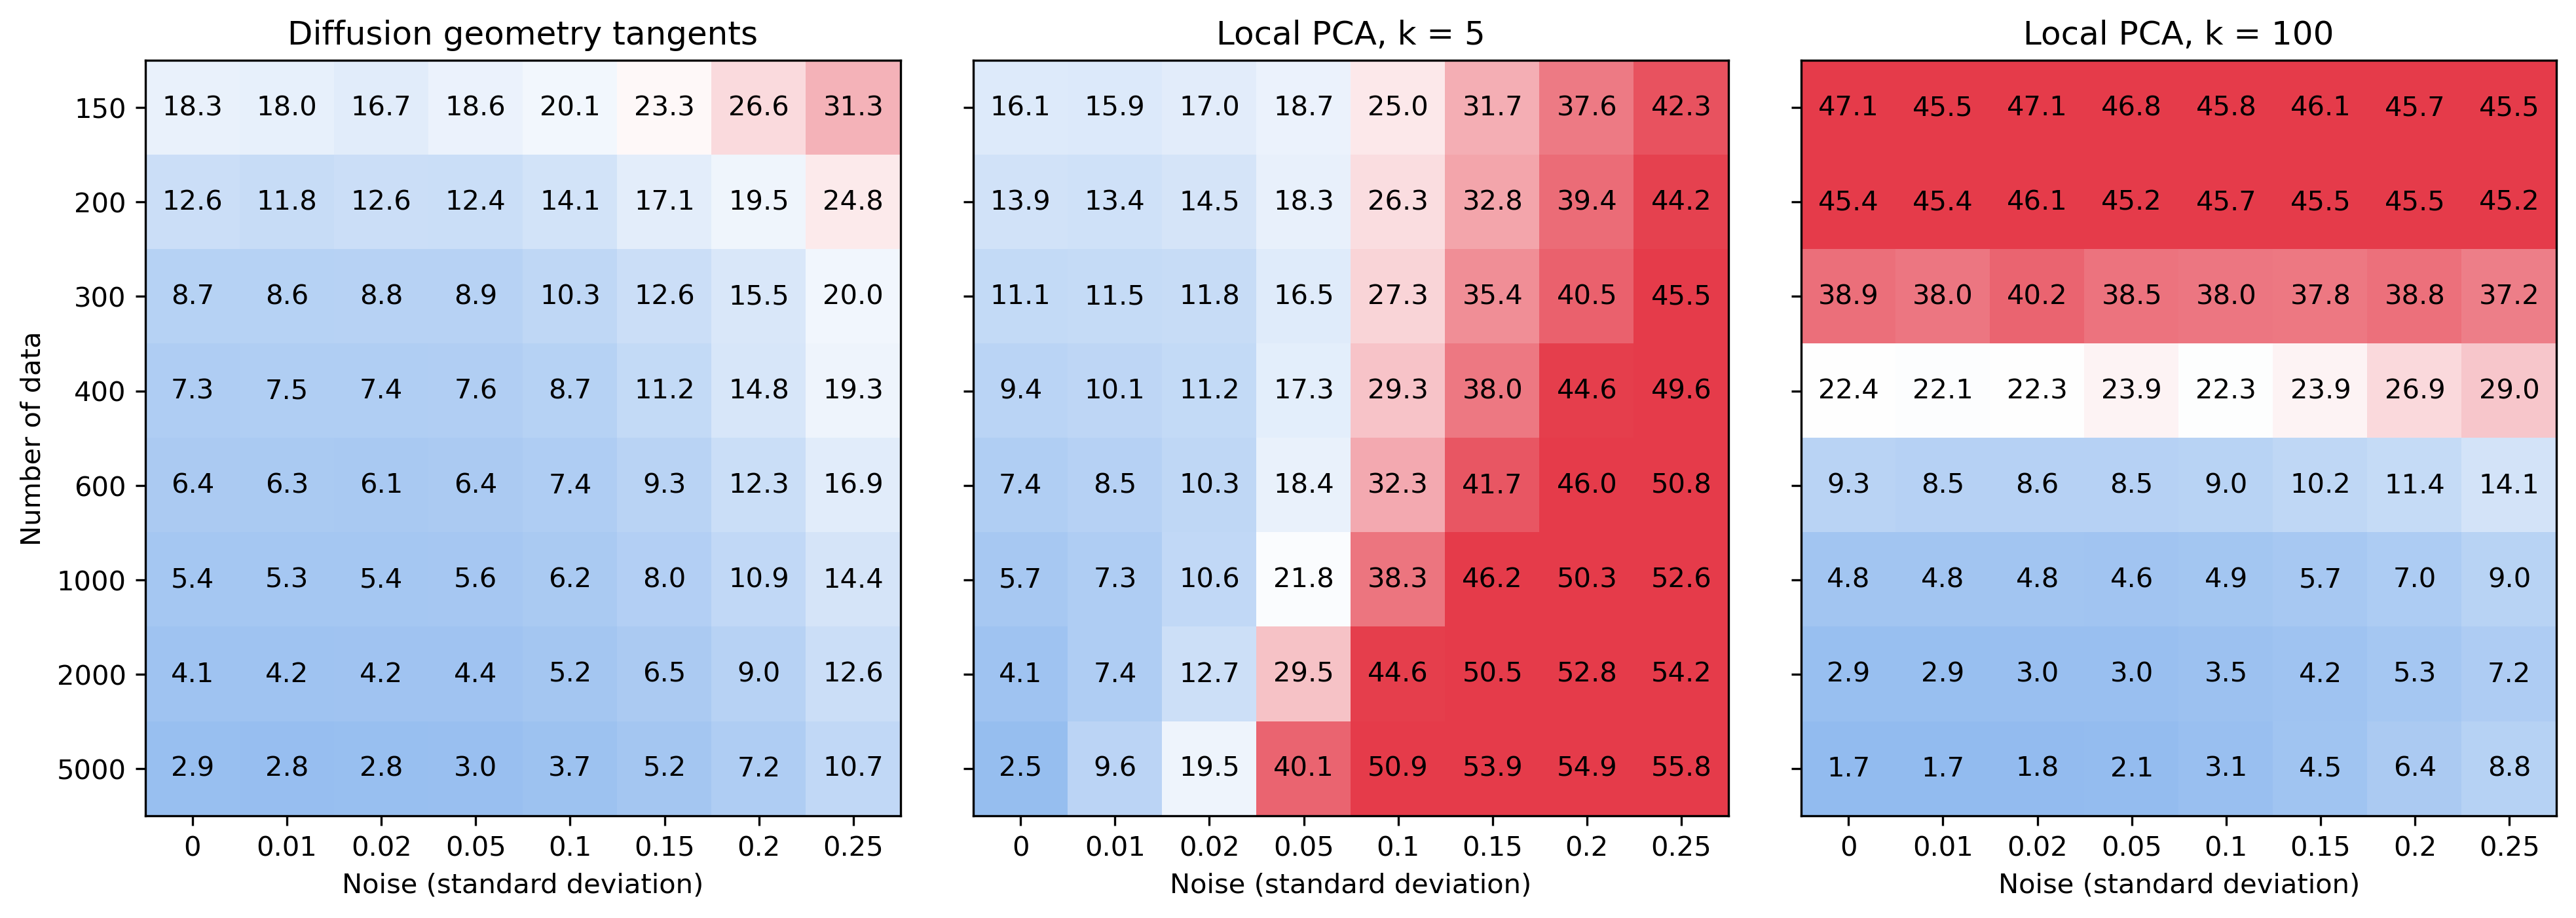

In [65]:
def heatmap(means_list, titles, numbers, sigmas):

    colors = [(0, "#8ab6ee"), 
              (0.5, 'white'), 
              (1, "#e53b4a")]
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

    n_means = len(means_list)
    size = 13

    fig, axs = plt.subplots(1,n_means, 
                            figsize = (size, n_means*size),
                            sharey=True,
                            dpi = 300)
    plt.tight_layout()
    
    for n, ax in enumerate(axs):
        means = means_list[n]
        ax.imshow(means, vmin=0, vmax = 45, cmap=cmap)
        for i in range(means.shape[0]):
            for j in range(means.shape[1]):
                ax.text(j, i, f'{means[i, j]:.1f}', ha='center', va='center', color='black')

        ax.set_yticks(ticks=np.arange(len(numbers)), labels=numbers)
        ax.set_xticks(ticks=np.arange(len(sigmas)), labels=sigmas)

        ax.set_xlabel('Noise (standard deviation)')
        # ax.xaxis.set_ticks_position('top')
        ax.set_title(titles[n])
    axs[0].set_ylabel('Number of data')

    return fig, ax



heatmap([diffusion_means,lpca_means1,lpca_means2], 
        ['Diffusion geometry tangents', 'Local PCA, k = 5', 'Local PCA, k = 100'],
        numbers, sigmas)
# heatmap([diffusion_stds,lpca_stds1,lpca_stds2], 
#         ['Tangent Diffusion', 'Local PCA, k = 5', 'Local PCA, k = 100'],
#         numbers, sigmas)